Tutorial 0: Visualization
=========================

In this tutorial, we'll cover visualization in PyAutoLens and make sure images display properly on your computer.

First, lets load an image of a (simulated) strong lens. Don't worry too much about what the code below is doing as it
will be covered in a later tutorial.

In [1]:
%matplotlib inline

import autolens as al
import autolens.plot as aplt

The tutorials need to know the path to your autolens_workspace folder, in order to:
 
 - Load configuration settings from the config files.
 - Load example data.
 - Output the results of models fits to your hard-disk. 
    
Unfortunately, Jupyter notebooks cannot use relative paths, therefore we use the library 'pyprojroot' to do instead. Its
'here' function provides the path to the GitHub project directory, which is the autolens_workspace. For example on my 
computer the here() function returns:
 
    '/home/jammy/PycharmProjects/PyAuto/autolens_workspace'

Throughout these tutorials, we will use this workspace_path.

In [2]:
from pyprojroot import here

workspace_path = str(here())
print("Workspace Path: ", workspace_path)

Workspace Path:  /home/carlos/autolens_workspace


The dataset path specifies where the dataset is located, this time in the directory 'chapter_path/dataset'

In [3]:
dataset_path = f"{workspace_path}/howtolens/dataset/chapter_1"

We now load this dataset from .fits files and create an instance of an 'imaging' object.

In [4]:
imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise_map.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.1,
)

We can plot an image as follows:

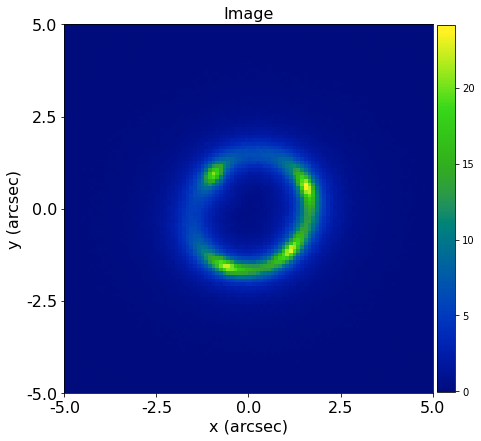

In [5]:
aplt.Imaging.image(imaging=imaging, )

You can customize a number of matplotlib setup options using a Plotter object in PyAutoLens.

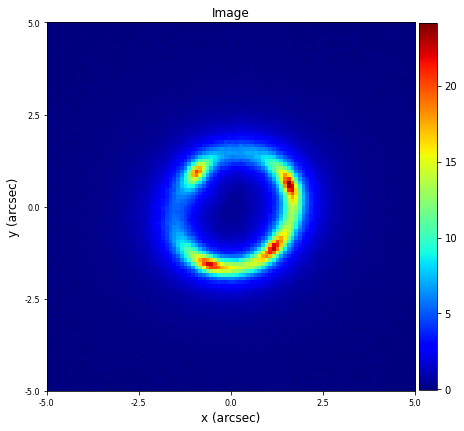

In [7]:
imaging = al.Imaging.from_fits(
    image_path=f"{dataset_path}/image.fits",
    noise_map_path=f"{dataset_path}/noise_map.fits",
    psf_path=f"{dataset_path}/psf.fits",
    pixel_scales=0.1,
)

plotter = aplt.Plotter(
    figure=aplt.Figure(figsize=(7, 7)),
    ticks=aplt.Ticks(ysize=5, xsize=8),
    labels=aplt.Labels(ysize=12, xsize=12, titlesize=12),
)

aplt.Imaging.image(imaging=imaging, plotter=plotter)

Many matplotlib options can be customized, but for now we're only concerned with making sure figures display cleanly in 
your Jupter Notebooks. However, for future reference, a descrition of all options can be found in the file 
'autolens_workspace/plot/mat_objs.py'.

Ideally, we wouldn't need to specify a new _Plotter_ every time we plot an image we make, especially as you'll be 
changing the same option to the same value over and over again (e.g. the figsize). Fortunately, the default values 
used by PyAutoLens can be fully customized.

Checkout the the file 'autolens_workspace/config/visualize/figures.ini'.

All default matplotlib values used by PyAutoLens are here. There's lots, so lets only focus on whats important for 
displaying figures correctly:

[figures] -> figsize

[labels] -> titlesize, ysize, xsize

[ticks] -> ysize, xsize

Don't worry about all the other options listed in this file for now, as they'll make a lot more sense once you are 
familiar with PyAutoLens.

(Note that you will need to reset your Juypter notebook server for these changes to take effect, so make sure you 
have the right values using the function above beforehand!)

In addition to individual 'figures' which use a 'plotter' to plot them, PyAutoLens also plots 'subplots' using a 
'sub_plotter'. Lets plot a subplot of our _Imaging_ data:

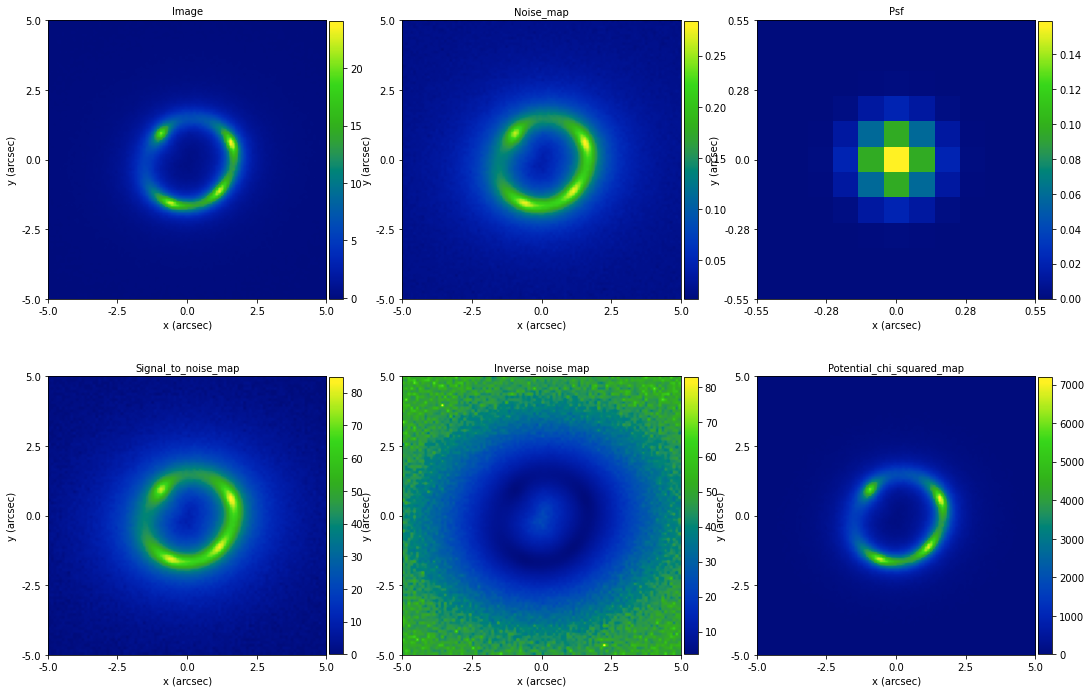

In [8]:
aplt.Imaging.subplot_imaging(imaging=imaging)

Again, we can customize this subplot using a SubPlotter.

(The '.sub' ensures we load the setting values from the config file 'autolens_workspace/config/visualize/subplots.ini'

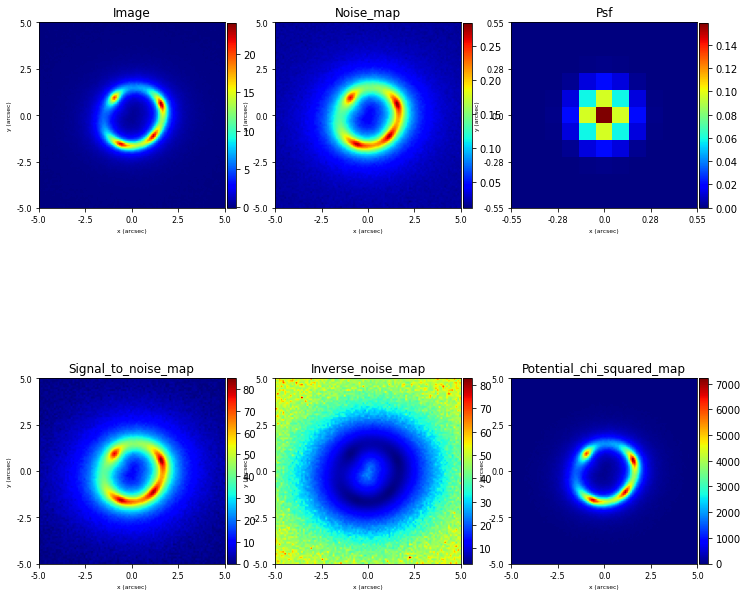

In [9]:
sub_plotter = aplt.SubPlotter(
    figure=aplt.Figure.sub(figsize=(12, 12)),
    ticks=aplt.Ticks.sub(ysize=8, xsize=8),
    labels=aplt.Labels.sub(ysize=6, xsize=6, titlesize=12),
)

aplt.Imaging.subplot_imaging(imaging=imaging, sub_plotter=sub_plotter)

Again, you can customize the default appearance of subplots by editing the config file 
autolens_workspace/config/visualize/subplots.ini'.

The other thing we can do with figures is choose what we include in the plot. For example, we can choose whether to 
include the origin of the coordinate system on our plot of the image:

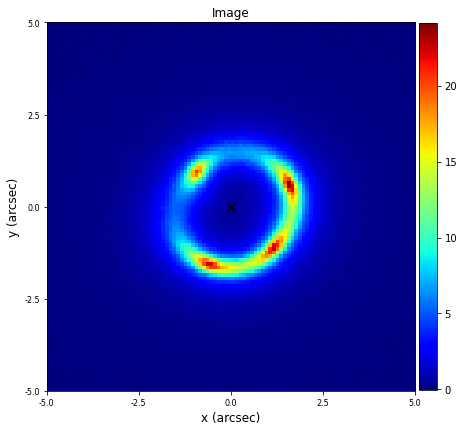

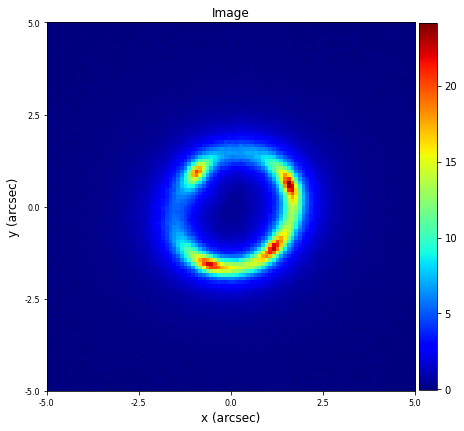

In [10]:
aplt.Imaging.image(imaging=imaging, plotter=plotter, include=aplt.Include(origin=True))

aplt.Imaging.image(imaging=imaging, plotter=plotter, include=aplt.Include(origin=False))

Throughout the HowToLens lecture series you'll see lots more objects that can include on figures.

Just like the matplotlib setup, you can customize what does and does not appear on figures by default using the 
config file 'autolens_workspace/config/visualize/general.ini'

Great! Hopefully, visualization in PyAutoLens is displaying nicely for us to get on with the HowToLens lecture series.